In [1]:
import tensorflow as tf
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Kshitiz Bhargava 21BCE2067

In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Reshape to include channel dimension (necessary for Conv2D layers)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Kshitiz Bhargava 21BCE2067

In [3]:
# Define the Encoder
def build_encoder(latent_dim=64):
    encoder = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'),
        layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'),
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu')  # Compressed representation
    ])
    return encoder

# Kshitiz Bhargava 21BCE2067

In [4]:
# Define the Decoder
def build_decoder(latent_dim=64):
    decoder = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(7 * 7 * 64, activation='relu'),
        layers.Reshape((7, 7, 64)),
        layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(1, kernel_size=3, strides=1, padding='same', activation='sigmoid')  # Output layer
    ])
    return decoder

# Kshitiz Bhargava 21BCE2067

In [5]:
# Build and compile the Autoencoder model
latent_dim = 64
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)

# Define the Autoencoder model
class Autoencoder(tf.keras.Model):
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(encoder, decoder)
autoencoder.compile(optimizer='adam', loss='mse')  # Using MSE for reconstruction error

# Train the Autoencoder
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

# Kshitiz Bhargava 21BCE2067

Epoch 1/10
235/235 [==============================] - 11s 44ms/step - loss: 0.0580 - val_loss: 0.0165
Epoch 2/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0112 - val_loss: 0.0077
Epoch 3/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 4/10
235/235 [==============================] - 11s 45ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 5/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 6/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 7/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 8/10
235/235 [==============================] - 11s 45ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/10
235/235 [==============================] - 11s 45ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/10
235/235 [==============================] - 10s 44ms/step - loss: 0.003

In [ ]:
def plot_reconstructed_images(model, test_images, n=10):
    # Select random test images
    indices = np.random.choice(range(len(test_images)), n)
    selected_images = test_images[indices]

    # Generate reconstructed images
    reconstructed_images = model(selected_images)

    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(selected_images[i].squeeze(), cmap="gray")
        plt.axis("off")
        
        # Reconstructed image
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i].numpy().squeeze(), cmap="gray")
        plt.axis("off")

    plt.show()

# Kshitiz Bhargava 21BCE2067

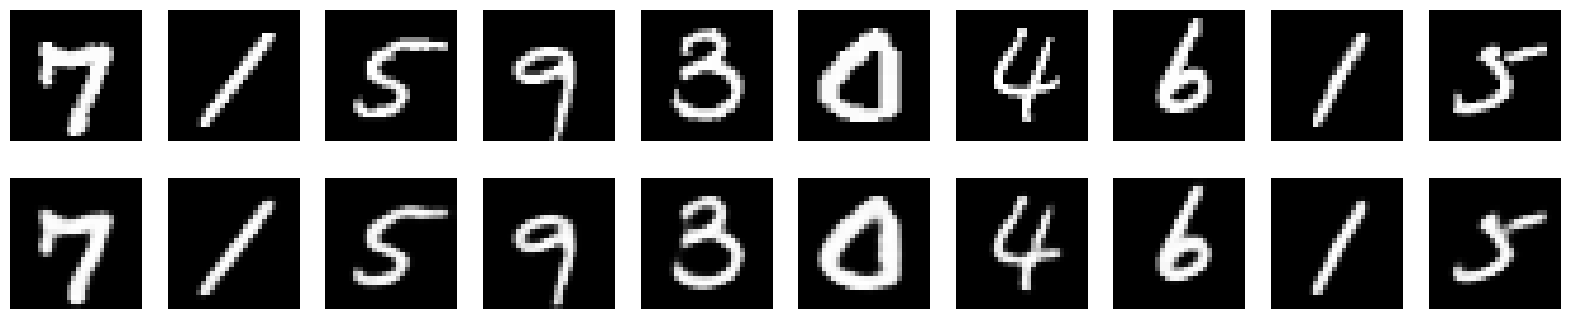

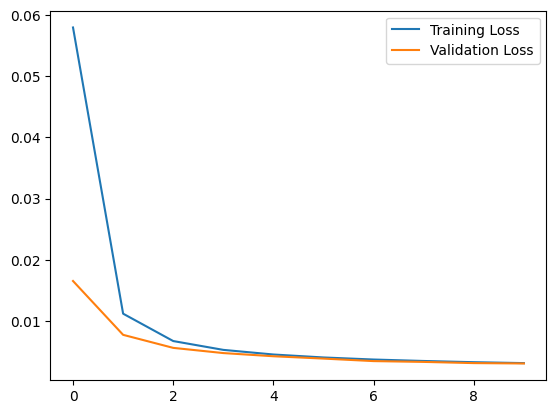

In [7]:
# Plot some reconstructed images
plot_reconstructed_images(autoencoder, x_test)

# Display loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Kshitiz Bhargava 21BCE2067